# This time we are going to work with color images...

We will be working with the CIFAR-10 dataset, which is color images of various objects.

In [22]:
from keras.datasets import cifar10

In [23]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [24]:
x_train.shape

(50000, 32, 32, 3)

In [25]:
x_train[0].shape

(32, 32, 3)

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

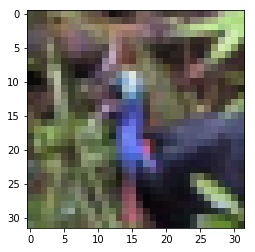

In [27]:
plt.imshow(x_train[24])

We need to do a little bit of preprocessing...

In [28]:
x_train.max()

255

In [29]:
x_train = x_train/x_train.max()

x_test = x_test/x_test.max()

In [30]:
x_test.shape      # we have 50000 images for trainnig , 10000 for testing...

(10000, 32, 32, 3)

In [31]:
y_train  #   The labels are still in their normal integer category form...

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

We need to convert it to one-hot encoded

In [32]:
from keras.utils import to_categorical

The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

In [33]:
y_cat_train = to_categorical(y_train,10)    # we have 10 categories in this dataset.

In [34]:
y_cat_test = to_categorical(y_test,10)

Building the model:

In [37]:
from keras.models import Sequential

In [38]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [42]:
model = Sequential()

# convolution layer_1:
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
# MaxPool layer_1:
model.add(MaxPool2D(pool_size=(2,2)))

# we will be adding one more convolution layer since the images are a littel complex, little larger than mnist,
# plus we have the three color channels...

# convolution layer_2:
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
# MaxPool layer_1:
model.add(MaxPool2D(pool_size=(2,2)))

#Flatten:
model.add(Flatten())

#Dense Hidden layer:  # generally the choice for number of neurons is 2 to the power of something ,
# some famous choice of researches are 128,256,512,etc...
model.add(Dense(256,activation='relu'))

#The last layer_ classifier: output layer
model.add(Dense(10,activation='softmax'))

#compile
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])




In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total para

In [70]:
model.fit(x_train,y_cat_train,verbose=1,epochs=10)   

Epoch 1/10
50000/50000 [==============================] - 59s 1ms/step - loss: 1.5168 - acc: 0.4547
Epoch 2/10
50000/50000 [==============================] - 58s 1ms/step - loss: 1.1652 - acc: 0.5941
Epoch 3/10
50000/50000 [==============================] - 57s 1ms/step - loss: 1.0158 - acc: 0.6470
Epoch 4/10
50000/50000 [==============================] - 56s 1ms/step - loss: 0.9184 - acc: 0.6835
Epoch 5/10
50000/50000 [==============================] - 56s 1ms/step - loss: 0.8474 - acc: 0.7108
Epoch 6/10
50000/50000 [==============================] - 57s 1ms/step - loss: 0.7935 - acc: 0.7320
Epoch 7/10
50000/50000 [==============================] - 58s 1ms/step - loss: 0.7451 - acc: 0.7480
Epoch 8/10
50000/50000 [==============================] - 56s 1ms/step - loss: 0.7126 - acc: 0.7578
Epoch 9/10
50000/50000 [==============================] - 56s 1ms/step - loss: 0.6791 - acc: 0.7731
Epoch 10/10
50000/50000 [==============================] - 48s 968us/step - loss: 0.6561 - acc: 0.77

evaluating the model:

In [71]:
model.metrics_names

['loss', 'acc']

In [72]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 5s 539us/step


[1.1300515442848205, 0.6729]

#### Let's perform classification report:

In [73]:
from sklearn.metrics import classification_report

In [74]:
predictions = model.predict_classes(x_test)

In [75]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.70      0.69      0.70      1000
          1       0.86      0.77      0.81      1000
          2       0.51      0.62      0.56      1000
          3       0.52      0.45      0.48      1000
          4       0.62      0.66      0.64      1000
          5       0.70      0.41      0.52      1000
          6       0.64      0.82      0.72      1000
          7       0.78      0.68      0.73      1000
          8       0.70      0.84      0.77      1000
          9       0.74      0.79      0.77      1000

avg / total       0.68      0.67      0.67     10000



Saving this updated version of the model to our DATA folder:

In [76]:
model.save(r"C:\Users\JERRY\Python_2K24_25\OpenCV Udemy\Computer-Vision-with-Python\DATA\Updated_Keras CNN with CIFAR_10")   # and now its saved.

The trainning could be very time consuming for this case , depending upon the speed of the computer, so we just simply use the .h5 trainned model that we have in our DATA.

In [62]:
from keras.models import load_model

In [63]:
my_model = load_model(r"C:\Users\JERRY\Python_2K24_25\OpenCV Udemy\Computer-Vision-with-Python\06-Deep-Learning-Computer-Vision\cifar_10epochs.h5")

In [64]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 5s 500us/step


[2.3167052200317384, 0.0999]

Let's see the classification report:

In [65]:
from sklearn.metrics import classification_report

In [66]:
predictions = model.predict_classes(x_test)

In [67]:
predictions

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [68]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1000
          1       0.00      0.00      0.00      1000
          2       0.00      0.00      0.00      1000
          3       0.10      0.99      0.18      1000
          4       0.00      0.00      0.00      1000
          5       0.00      0.00      0.00      1000
          6       0.00      0.00      0.00      1000
          7       0.20      0.01      0.02      1000
          8       0.06      0.00      0.01      1000
          9       0.00      0.00      0.00      1000

avg / total       0.04      0.10      0.02     10000

